In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import  r2_score ,mean_absolute_error,mean_squared_error
import xgboost as xgb

In [2]:
# Load dataset (Kaggle )
data = pd.read_csv("C:/Users/LSPC/Downloads/realest.csv")
print(data.head())
print(data.info())


     Price  Bedroom   Space  Room   Lot     Tax  Bathroom  Garage  Condition
0  53000.0      2.0   967.0   5.0  39.0   652.0       1.5     0.0        0.0
1  55000.0      2.0   815.0   5.0  33.0  1000.0       1.0     2.0        1.0
2  56000.0      3.0   900.0   5.0  35.0   897.0       1.5     1.0        0.0
3  58000.0      3.0  1007.0   6.0  24.0   964.0       1.5     2.0        0.0
4  64000.0      3.0  1100.0   7.0  50.0  1099.0       1.5     1.5        0.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Price      156 non-null    float64
 1   Bedroom    156 non-null    float64
 2   Space      146 non-null    float64
 3   Room       156 non-null    float64
 4   Lot        146 non-null    float64
 5   Tax        147 non-null    float64
 6   Bathroom   156 non-null    float64
 7   Garage     156 non-null    float64
 8   Condition  156 non-null    fl

In [3]:
# checking  rows and columns
print(data.head())
data.shape

     Price  Bedroom   Space  Room   Lot     Tax  Bathroom  Garage  Condition
0  53000.0      2.0   967.0   5.0  39.0   652.0       1.5     0.0        0.0
1  55000.0      2.0   815.0   5.0  33.0  1000.0       1.0     2.0        1.0
2  56000.0      3.0   900.0   5.0  35.0   897.0       1.5     1.0        0.0
3  58000.0      3.0  1007.0   6.0  24.0   964.0       1.5     2.0        0.0
4  64000.0      3.0  1100.0   7.0  50.0  1099.0       1.5     1.5        0.0


(157, 9)

In [4]:
# Checking missing values 
data.isnull().sum()


Price         1
Bedroom       1
Space        11
Room          1
Lot          11
Tax          10
Bathroom      1
Garage        1
Condition     1
dtype: int64

In [5]:
# statistical measures of dataset
data.describe()

,Price,Bedroom,Space,Room,Lot,Tax,Bathroom,Garage,Condition
count,156.000000,156.000000,146.000000,156.000000,146.000000,147.000000,156.000000,156.000000,156.000000
mean,56474.358974,3.166667,1097.246575,6.500000,32.808219,911.707483,1.480769,0.846154,0.230769
std,12875.307058,1.348037,462.540698,1.675247,8.457859,443.263430,0.529408,0.808454,0.422682
min,32000.000000,1.000000,539.000000,4.000000,24.000000,418.000000,1.000000,0.000000,0.000000
25%,46000.000000,2.000000,805.250000,5.000000,25.000000,652.500000,1.000000,0.000000,0.000000
50%,55000.000000,3.000000,965.500000,6.000000,30.000000,821.000000,1.500000,1.000000,0.000000
75%,65000.000000,4.000000,1220.500000,7.000000,37.000000,1012.500000,2.000000,1.500000,0.000000
max,90000.000000,8.000000,2295.000000,12.000000,50.000000,2752.000000,3.000000,2.000000,1.000000


In [6]:
# Fill numeric columns with median
for col in data.select_dtypes(include=['number']).columns:
    data[col].fillna(data[col].median(), inplace=True)

# Fill categorical columns with mode
for col in data.select_dtypes(include=['object']).columns:
    data[col].fillna(data[col].mode()[0], inplace=True)

data.isnull().sum()

Price        0
Bedroom      0
Space        0
Room         0
Lot          0
Tax          0
Bathroom     0
Garage       0
Condition    0
dtype: int64

<Axes: >

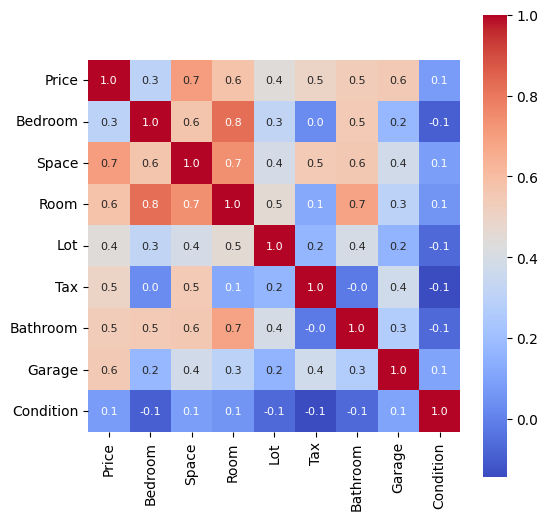

In [7]:
# checking correlation
correlation=data.corr(numeric_only=True)
plt.figure(figsize=(6,6))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True,annot_kws={'size':8}, cmap='coolwarm')

In [8]:
# Select numeric features for simplicity
numeric_features = data.select_dtypes(include=[np.number])
print(numeric_features.columns)


Index(['Price', 'Bedroom', 'Space', 'Room', 'Lot', 'Tax', 'Bathroom', 'Garage',
       'Condition'],
      dtype='object')


In [9]:
#Define Features (X) and Target (y)
X = numeric_features.drop(['Price'], axis=1)
y = numeric_features['Price']


In [10]:
#Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)


In [11]:
print(X.shape, X_train.shape, X_test.shape)


(157, 8) (125, 8) (32, 8)


In [12]:
# Training XGBoost Model
xgb_model = xgb.XGBRegressor(
    n_estimators=200,       # keep small, dataset is tiny
    max_depth=2,            # shallow trees to avoid overfitting
    learning_rate=0.1,      # small but not too small
    subsample=0.7,          # use 70% of rows for each tree
    colsample_bytree=0.7,   # use 70% of features for each tree
    reg_alpha=0.1,          # L1 regularization
    reg_lambda=1,           # L2 regularization
    random_state=42
)

xgb_model.fit(
    X_train, y_train
)




XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=200, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [13]:
# Evaluation of the model for training data
model_pred=xgb_model.predict(X_train)
print(model_pred)

[49926.617 57334.387 38578.68  50705.598 61112.953 63617.21  56416.176
 46990.676 54533.965 43467.355 52276.773 67958.94  87568.62  51908.24
 47791.227 56521.43  87090.49  46891.902 53938.22  60696.492 32721.922
 59476.348 70824.27  56657.14  60841.844 65328.71  49926.617 67667.91
 47173.68  56628.543 61742.26  64308.805 87262.4   46258.906 56012.445
 52524.9   69949.27  45083.07  64342.246 65328.71  59931.418 56812.586
 42235.207 64029.91  43288.1   49926.617 47394.277 68949.3   36301.234
 43153.246 57242.566 43235.723 80728.61  81887.34  45609.19  70563.74
 54320.113 48749.047 86764.02  56649.293 64510.145 56980.816 43809.332
 45716.285 63077.85  47937.61  80728.61  57156.01  61658.094 69378.39
 37408.582 70661.96  65113.4   68035.11  87568.62  50743.258 45842.445
 45646.49  45632.2   47303.434 70535.28  48967.875 70364.164 68491.04
 59223.58  66976.43  46258.906 38603.707 70364.164 50291.234 52235.312
 47995.574 57302.113 63617.21  41820.848 44487.62  56591.008 60777.098
 51799.26  

In [38]:
# R squared error
Score_1=r2_score(y_train, model_pred)
# Mean Absolute error
Score_2=mean_absolute_error(y_train, model_pred)

print('XGBoost R squared error:',Score_1)
print('XGBoost Mean Absolute error:',Score_2)

XGBoost R squared error: 0.9817803596045206
XGBoost Mean Absolute error: 1343.6525


In [15]:
# Evaluation of the model for test data
test_data_pred=xgb_model.predict(X_test)


In [39]:
# R squared error
Score_3=r2_score(y_test, test_data_pred)
# Mean absolute error
Score_4=mean_absolute_error(y_test, test_data_pred)

print('XGBoost R squared error:',Score_3)
print('XGBoost Mean Absolute error:',Score_4)

XGBoost R squared error: 0.8644625689557409
XGBoost Mean Absolute error: 3907.302490234375


0.6312932914793935


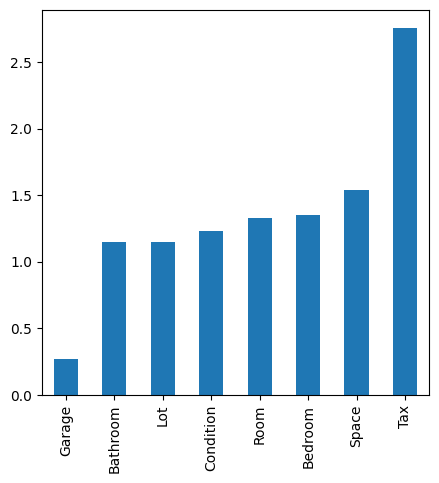

In [ ]:
# check skewness for Linear regression
print(y_train.skew())  # target skewness
pd.DataFrame(X_train).skew().sort_values().plot(kind='bar', figsize=(5,5))
plt.show()

In [25]:
# make a copy
X_train_transformed = X_train.copy()
X_test_transformed = X_test.copy()

# list of skewed features
skewed_features = ["Bathroom", "Lot", "Condition", "Room", "Bedroom", "Space", "Tax"]

for feature in skewed_features:
    if X_train[feature].skew() > 2:   # high skew
        X_train_transformed[feature] = np.log1p(X_train[feature])
        X_test_transformed[feature]  = np.log1p(X_test[feature])
    else:   # moderate skew
        X_train_transformed[feature] = np.sqrt(X_train[feature])
        X_test_transformed[feature]  = np.sqrt(X_test[feature])


In [ ]:
#Train Linear Regression Model

#Train the model with transformed data
# Initialize the model
lr = LinearRegression()

# Fit on transformed training data
lr.fit(X_train_transformed, y_train)


LinearRegression()

In [27]:
# Predict on train and test sets
y_train_pred = lr.predict(X_train_transformed)
y_test_pred  = lr.predict(X_test_transformed)


In [28]:
# R² scores
print("Train R²:", r2_score(y_train, y_train_pred))
print("Test R² :", r2_score(y_test, y_test_pred))

# RMSE
print("Train RMSE:", np.sqrt(mean_squared_error(y_train, y_train_pred)))
print("Test RMSE :", np.sqrt(mean_squared_error(y_test, y_test_pred)))


Train R²: 0.7535156910948906
Test R² : 0.6498993811466931
Train RMSE: 6324.774353543141
Test RMSE : 7689.075004726499


In [29]:
from sklearn.preprocessing import PolynomialFeatures

# Create polynomial + interaction features (degree=2 means squares + pairwise products)
poly = PolynomialFeatures(degree=2, include_bias=False)

# Fit on train and transform both train & test
X_train_poly = poly.fit_transform(X_train_transformed)
X_test_poly  = poly.transform(X_test_transformed)

print("Original features:", X_train_transformed.shape[1])
print("After poly features:", X_train_poly.shape[1])


Original features: 8
After poly features: 44


In [35]:
lr_poly = LinearRegression()
lr_poly.fit(X_train_poly, y_train)

# Predictions
y_train_pred_poly = lr_poly.predict(X_train_poly)
y_test_pred_poly  = lr_poly.predict(X_test_poly)

# Evaluation
print("Linear Regression Train R²:", r2_score(y_train, y_train_pred_poly))
print("Linear Regression Test R² :", r2_score(y_test, y_test_pred_poly))
print("Linear Regression Train RMSE:", np.sqrt(mean_squared_error(y_train, y_train_pred_poly)))
print("Linear RegressionTest RMSE :", np.sqrt(mean_squared_error(y_test, y_test_pred_poly)))


Linear Regression Train R²: 0.9620116970056368
Linear Regression Test R² : 0.91278767729655
Linear Regression Train RMSE: 2482.9921347974705
Linear RegressionTest RMSE : 3837.6607879552826


In [36]:
# Compare models 

# prediction of Linear regression
print("Linear Regression R2:", r2_score(y_test, y_test_pred_poly))

# prediction of XGBoost
print("XGBoost R2:", r2_score(y_test, test_data_pred))

Linear Regression R2: 0.91278767729655
XGBoost R2: 0.8644625689557409


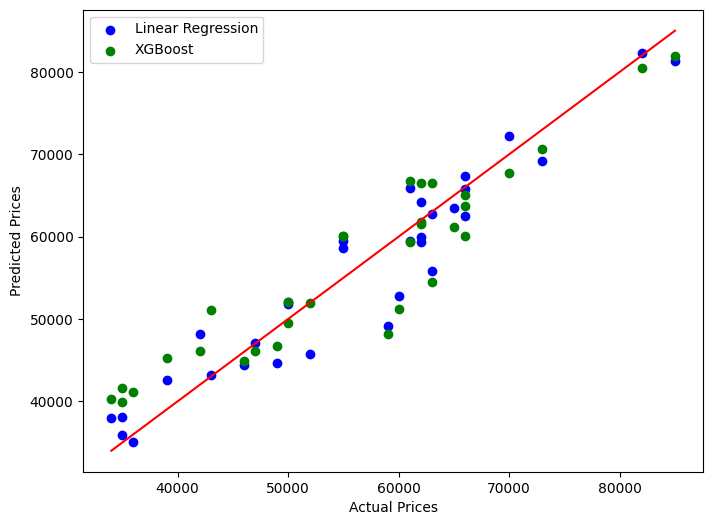

In [37]:
# Visualize Predictions
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_test_pred_poly, color='blue', label='Linear Regression')
plt.scatter(y_test, test_data_pred, color='green', label='XGBoost')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.legend()
plt.show()